In [1]:
import numpy as np
from types import SimpleNamespace
import scipy.linalg as la
import holoviews as hv

hv.notebook_extension()

# mgrid

:Layout
   .Raster.I  :Raster   [x,y]   (z)
   .Raster.II :Raster   [x,y]   (z)
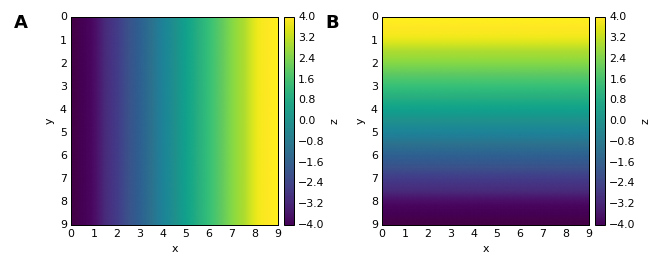

In [2]:
%%opts Raster (cmap='viridis' interpolation='sinc') [colorbar=True]
N = 4

x, y = np.mgrid[-N:N+1, -N:N+1]
hv.Raster(np.rot90(x)) + hv.Raster(np.rot90(y))

# wave function from kwant

In [4]:
import kwant
from kwant.continuum import discretize

In [5]:
tb = discretize('k_x**2 + k_y**2 + Vx * x + Vy * y')

In [6]:
syst = kwant.Builder()
shape = lambda s: -20 < s.pos[0] < 20 and -10 < s.pos[1] < 10
syst.fill(tb, shape, (0, 0));

syst = syst.finalized()

pars = SimpleNamespace(Vx=.03, Vy=0.05)
ev, evec = la.eigh(syst.hamiltonian_submatrix(args=[pars]))

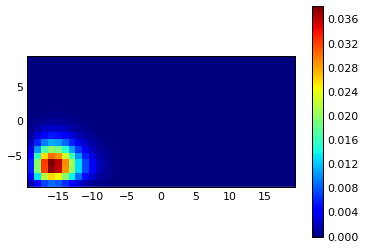

In [7]:
wf = np.abs(evec[:, 0])**2
kwant.plotter.map(syst, wf)

In [8]:
coords = np.array([s.pos for s in syst.sites])
wf = kwant.plotter.mask_interpolate(coords, wf)[0]

b':Raster   [x,y]   (z)'
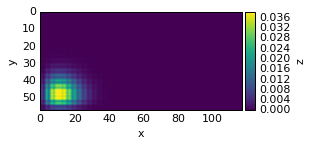

In [9]:
%%opts Raster (cmap='viridis' interpolation='sinc') [colorbar=True]

hv.Raster(np.rot90(wf))